In [4]:
# coalb 에서는 두번 실행 해야 합니다.
# 첫 번째 실행 - 폰트 설치 후 자동 재시작
# 두번째 실행 - 폰트 설치 완료
# https://github.com/c0z0c/jupyter_hangul
# 코딩 중간에 한글 깨진다 싶으면 helper.setup() 다시 호출 해줘도 됩니다.

from urllib.request import urlretrieve
urlretrieve("https://raw.githubusercontent.com/c0z0c/jupyter_hangul/master/helper_c0z0c_dev.py", "helper_c0z0c_dev.py")
import helper_c0z0c_dev as helper
print("📁 helper 모듈을 로드했습니다.")
helper.setup()

🚀 Jupyter/Colab 한글 환경 설정 중... (helper v2.3.0)
✅ matplotlib 한글 폰트 설정 완료
✅ 한글 폰트 및 pandas 확장 기능 설정 완료
🎉 사용 가능: 한글 폰트, CSV 읽기, DataFrame.head_att(), 캐시 기능
📁 helper 모듈을 로드했습니다.
🚀 Jupyter/Colab 한글 환경 설정 중... (helper v2.3.0)
✅ matplotlib 한글 폰트 설정 완료
✅ 한글 폰트 및 pandas 확장 기능 설정 완료
🎉 사용 가능: 한글 폰트, CSV 읽기, DataFrame.head_att(), 캐시 기능


# >기본< 라이브리 로드

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import (
    fetch_california_housing, load_iris, make_moons, make_circles,
    load_breast_cancer, load_wine
)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

# --- 다중공선성 진단용 (선택적) ---
try:
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print("statsmodels 라이브러리 로드 완료")
except Exception:
    print("statsmodels 라이브러리가 설치되어 있지 않습니다. 설치: !pip install statsmodels")

# --- 표준 라이브러리 및 유틸리티 ---
import io
import os
import gc
import json
import time
import random
import math
from datetime import datetime, timedelta
import pytz  # 시간대 처리

# --- 이미지 처리 ---
from PIL import Image, ImageDraw, ImageFilter
import cv2  # 필요시 설치: !pip install opencv-python

# --- 데이터/시각화 ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from IPython.display import display, Markdown
#from tqdm.auto import tqdm
from tqdm.notebook import tqdm

# --- PyTorch 관련 ---
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import transforms as v2
from torchvision.transforms import functional as TF
from torchvision.models import vgg16, VGG16_Weights
from torch.utils.data import Dataset, DataLoader, random_split

# --- 선택 패키지(주석) ---
# !pip install pytorch-msssim

# --- 시드 고정 ---
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# --- 디바이스 및 전역 설정 ---
__kst = pytz.timezone('Asia/Seoul')
global __kst
__device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
global __device
print('Device:', __device)

__model_class_list = []
global __model_class_list
# ...existing code...

statsmodels 라이브러리 로드 완료
Device: cpu


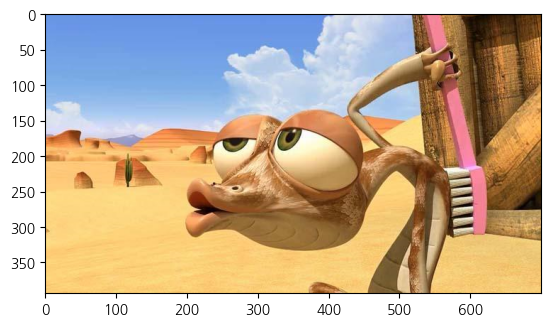

In [6]:

# https://c0z0c.github.io/sprint_mission/image/oscar.png
from PIL import Image
import requests
from io import BytesIO

url = "https://c0z0c.github.io/sprint_mission/image/oscar.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

plt.imshow(img)
plt.show()



- Image Info

In [7]:
# PIL 이미지 정보 출력 함수 예시
def img_info(img):
    print("이미지 크기:", img.size)
    print("컬러 모드:", img.mode)
    
    # 픽셀값 빈도수 집계
    pixels = list(img.getdata())
    from collections import Counter
    pixel_counts = Counter(pixels)
    
    # 가장 많은 값 3개
    most_common = pixel_counts.most_common(3)
    print("가장 많은 픽셀값 3개:", most_common)
    
    # 가장 적은 값 3개
    least_common = pixel_counts.most_common()[:-4:-1]
    print("가장 적은 픽셀값 3개:", least_common)
    
    # 히스토그램
    hist = img.histogram()
    import numpy as np
    hist_arr = np.array(hist)
    print("히스토그램 평균:", np.mean(hist_arr))
    print("히스토그램 표준편차:", np.std(hist_arr))

img_info(img)

이미지 크기: (700, 394)
컬러 모드: RGBA
가장 많은 픽셀값 3개: [((104, 150, 228, 255), 3647), ((108, 154, 231, 255), 2065), ((254, 216, 131, 255), 1440)]
가장 적은 픽셀값 3개: [((225, 191, 102, 255), 1), ((217, 183, 94, 255), 1), ((216, 182, 93, 255), 1)]
히스토그램 평균: 1077.34375
히스토그램 표준편차: 8697.820376269652


- Image 사이즈 변경

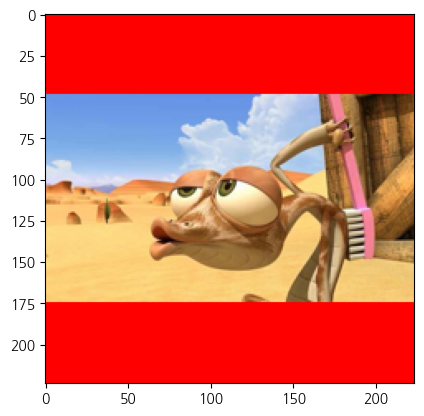

이미지 크기: (224, 224)
컬러 모드: RGB
가장 많은 픽셀값 3개: [((255, 0, 0), 21952), ((104, 150, 228), 362), ((108, 154, 231), 210)]
가장 적은 픽셀값 3개: [((248, 212, 123), 1), ((246, 207, 120), 1), ((245, 204, 115), 1)]
히스토그램 평균: 196.0
히스토그램 표준편차: 1391.4866806016028


In [8]:
class PLI_Scale:
    """이미지의 사이즈를 변경합니다.
    Args:
        img (_type_): PIL 이미지_
        target_size (tuple, optional): 테겟 사이즈. Defaults to (224,224).
        pad_color (tuple, optional): 패딩 색상. Defaults to (255,0,0).
        filter (_type_, optional): 필터 종류. Defaults to Image.BICUBIC.
            Image.NEAREST : 최근접 이웃(가장 빠름, 품질 낮음)
            Image.BOX : 박스 필터
            Image.BILINEAR : 선형 보간(2차)
            Image.HAMMING : 해밍 필터
            Image.BICUBIC : 큐빅 보간(4차, 품질 좋음)
            Image.LANCZOS : 란초스 필터(고품질, 특히 축소 시)
        reducing_gap (float, optional): 축소 시 최소 간격. Defaults to 3.0.
        padding (tuple, optional): 패딩 크기. Defaults to None (가운데로 정렬)
    Returns:
        _type_: PIL 이미지
    """
    def __init__(self, target_size=(224,224), color='RGB', pad_color=(255,0,0), resample = Image.BICUBIC, reducing_gap=3.0, padding=None):
        self.target_size = target_size
        self.color = color
        self.pad_color = pad_color
        self.resample = resample
        self.reducing_gap = reducing_gap
        self.padding = padding

    def safe_resize(self, img):
        w, h = img.size
        tw, th = self.target_size

        scale = min(tw/w, th/h)
        nw, nh = int(w * scale), int(h * scale)

        img_resize = img.resize(size=(nw, nh), resample=self.resample, reducing_gap=self.reducing_gap)
        
        if img.mode != self.color:
            img = img.convert(self.color)

        bg = Image.new(img.mode, self.target_size, self.pad_color)

        # 중앙에 배치
        left = (tw - nw) // 2
        top = (th - nh) // 2
        if type(self.padding) is tuple:
            if len(self.padding) == 2:
                left = self.padding[0]
                top = self.padding[1]
        elif type(self.padding) is str:
            if self.padding == "Random":
                max_left = tw - nw
                max_top = th - nh
                left = random.randint(0, max_left)
                top = random.randint(0, max_top)
        bg.paste(img_resize, (left, top))
        return bg

    def __call__(self, img):
        return self.safe_resize(img)

transfrom = v2.Compose([
    PLI_Scale(target_size=(224,224), pad_color=(255,0,0)),
])

out_img = transfrom(img)
#assert out_img.size == (224, 224), "이미지 크기가 올바르지 않습니다."
#assert out_img.mode == "RGB", "이미지 모드가 RGB가 아닙니다."
out_img

plt.imshow(out_img)
plt.show()
img_info(out_img)


- 회전

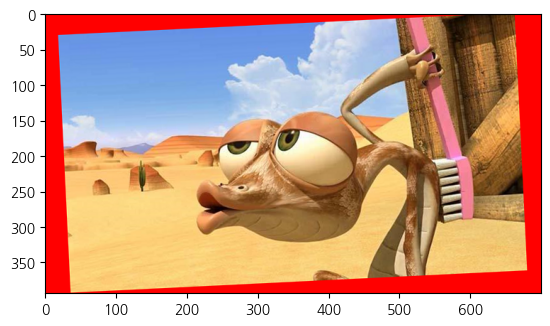

이미지 크기: (700, 394)
컬러 모드: RGB
가장 많은 픽셀값 3개: [((255, 0, 0), 40600), ((104, 150, 228), 2473), ((108, 154, 231), 1470)]
가장 적은 픽셀값 3개: [((254, 29, 16), 1), ((254, 39, 22), 1), ((254, 49, 28), 1)]
히스토그램 평균: 1077.34375
히스토그램 표준편차: 2947.853888594651


In [9]:
class PIL_Rotate:
    """PIL 입력 → 랜덤 회전 → PIL 반환"""
    def __init__(self, degrees=(-10, 10), color='RGB', pad_color=(255,0,0), resample=Image.BICUBIC, keep_original_size=True):
        self.degrees = degrees
        self.color = color
        self.pad_color = pad_color
        self.resample = resample
        self.keep_original_size = keep_original_size

    def safe_rotate(self, img):
        # 1. 각도를 라디안으로 변환
        if isinstance(self.degrees, tuple) and len(self.degrees) == 2:
            angle = random.uniform(self.degrees[0], self.degrees[1])
        else:
            angle = float(self.degrees)

        theta = math.radians(abs(angle))
        w, h = img.size

        # 2. 축소 비율 계산 (원본 유지 시)
        if self.keep_original_size:
            # 회전 후 이미지가 원본 영역을 벗어나지 않도록 축소
            cos_theta = abs(math.cos(theta))
            sin_theta = abs(math.sin(theta))
            scale_w = w / (w * cos_theta + h * sin_theta)
            scale_h = h / (h * cos_theta + w * sin_theta)
            scale = min(scale_w, scale_h)
            new_w, new_h = int(w * scale), int(h * scale)
        else:
            new_w, new_h = w, h

        if img.mode != self.color:
            img = img.convert(self.color)

        img_resized = img.resize((new_w, new_h), self.resample)

        # 4. 중앙에 패딩 (원래 크기)
        bg = Image.new(img.mode, (w, h), self.pad_color)
        left = (w - new_w) // 2
        top = (h - new_h) // 2
        bg.paste(img_resized, (left, top))

        # 5. 회전 (expand=False, fillcolor=pad_color)
        rotated = bg.rotate(angle, resample=Image.BICUBIC, expand=False, fillcolor=self.pad_color)
        return rotated

    def __call__(self, img):
        return self.safe_rotate(img)

transfrom = v2.Compose([
    PIL_Rotate(degrees=(-10, 10), keep_original_size=True),
])

out_img = transfrom(img)
plt.imshow(out_img)
plt.show()
img_info(out_img)


- 노이즈

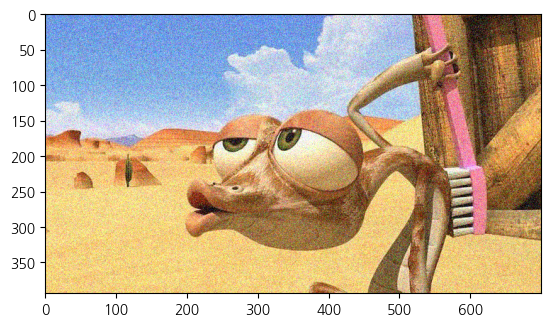

이미지 크기: (700, 394)
컬러 모드: RGBA
가장 많은 픽셀값 3개: [((255, 255, 255, 255), 34), ((0, 0, 0, 255), 18), ((255, 255, 118, 255), 17)]
가장 적은 픽셀값 3개: [((216, 202, 77, 255), 1), ((226, 182, 163, 207), 1), ((252, 162, 126, 255), 1)]
히스토그램 평균: 1077.34375
히스토그램 표준편차: 4571.357550284058


In [10]:
class PILAddNoise:
    """PIL 입력 → 노이즈 적용 → PIL 반환"""
    def __init__(self, noise_factor=0.1):
        self.noise_factor = noise_factor

    def __call__(self, img):
        tensor = TF.to_tensor(img).float()
        if tensor.max() > 1.0:
            tensor = tensor / 255.0
        noise = torch.randn_like(tensor) * self.noise_factor
        noisy = torch.clamp(tensor + noise, 0., 1.)
        return TF.to_pil_image(noisy)
transfrom = v2.Compose(
    [
        PILAddNoise(noise_factor=0.1),
    ]
)

out_img = transfrom(img)
plt.imshow(out_img)
plt.show()
img_info(out_img)


- 블러

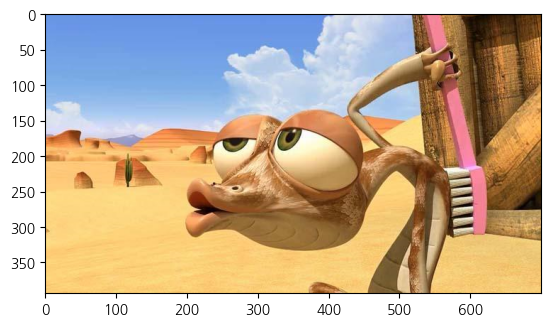

이미지 크기: (700, 394)
컬러 모드: RGBA
가장 많은 픽셀값 3개: [((104, 150, 228, 255), 3647), ((108, 154, 231, 255), 2065), ((254, 216, 131, 255), 1440)]
가장 적은 픽셀값 3개: [((225, 191, 102, 255), 1), ((217, 183, 94, 255), 1), ((216, 182, 93, 255), 1)]
히스토그램 평균: 1077.34375
히스토그램 표준편차: 8697.820376269652


In [11]:
class PILRandomBlur:
    """PIL 입력 → 랜덤 블러 → PIL 반환"""
    def __init__(self, radius=(1.0, 2.0)):
        self.radius = radius

    def __call__(self, img):
        r = random.uniform(*self.radius)
        return img.filter(ImageFilter.GaussianBlur(radius=r))
   

transfrom = v2.Compose(
    [
        PILRandomBlur(radius=(0, 2.0)),
    ]
)

out_img = transfrom(img)
plt.imshow(out_img)
plt.show()
img_info(out_img)    

- 얼룩

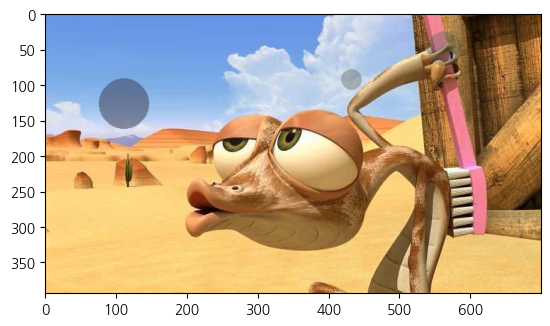

이미지 크기: (700, 394)
컬러 모드: RGB
가장 많은 픽셀값 3개: [((104, 150, 228), 3647), ((108, 154, 231), 2065), ((254, 216, 131), 1440)]
가장 적은 픽셀값 3개: [((225, 191, 102), 1), ((217, 183, 94), 1), ((216, 182, 93), 1)]
히스토그램 평균: 1077.34375
히스토그램 표준편차: 1469.6026006070272


In [20]:
class PILRandomStain:
    """PIL 입력 → 랜덤 얼룩 → PIL 반환"""
    def __init__(self, stain_count=(1, 5), stain_radius=(10, 40), color='RGB', stain_color=(80, 80, 80), alpha=(80, 180)):
        self.stain_count = stain_count
        self.stain_radius = stain_radius
        self.color = color
        self.stain_color = stain_color
        self.alpha = alpha

    def __call__(self, img):

        img = img.convert("RGBA")
        overlay = Image.new("RGBA", img.size, (0, 0, 0, 0))
        draw = ImageDraw.Draw(overlay)

        count = random.randint(*self.stain_count)
        for _ in range(count):
            r = random.randint(*self.stain_radius)
            x = random.randint(0, img.size[0] - 1)
            y = random.randint(0, img.size[1] - 1)
            color = (
                self.stain_color[0] + random.randint(-30, 30),
                self.stain_color[1] + random.randint(-30, 30),
                self.stain_color[2] + random.randint(-30, 30),
                random.randint(*self.alpha)
            )
            draw.ellipse([(x - r, y - r), (x + r, y + r)], fill=color)

        out = Image.alpha_composite(img, overlay)
        if out.mode != self.color:
            out = out.convert(self.color)
        return out
    
transfrom = v2.Compose(
    [
        PILRandomStain(),
    ]
)

out_img = transfrom(img)
plt.imshow(out_img)
plt.show()
img_info(out_img)        